In [15]:
%load_ext autoreload
%autoreload 2

from deep_bf.data_handler import DataLoader
import torch
import numpy as np
from tqdm import tqdm
import os

#urls = "/home/panda/rf_data/dataset/webdataset/dataset-{000..005}.tar"
base_url = "/home/panda/rf_data/dataset/webdataset"

samples_idx_path = "/home/panda/rf_data/dataset/samples_idx"

dl = DataLoader("/home/panda/rf_data/")
df = dl.get_df()

nc = 128
ns = 2800

nz = 2048
nx = 256

seed = 42
batch_size = 2

device = "cuda"
dtype = torch.float32

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from deep_bf.dataset import GlobalSamplesIdx
gsi = GlobalSamplesIdx()

In [17]:
gsi.samples_idx.shape

torch.Size([12, 128, 2048, 256])

In [18]:
from deep_bf.dataset import get_datasets

train, val = get_datasets(base_url, seed, batch_size)
it = iter(train)

In [14]:
sample = next(it)
sample[0].shape

torch.Size([2, 1, 128, 2800])

In [19]:
from deep_bf.models import DAS

sample = next(it)
model = DAS(gsi).to("cuda")

i = 12
for _ in range(i):
    sample = next(it)

output = model(sample).squeeze(-1)

In [20]:
print(output.shape)

torch.Size([2, 2048, 256])


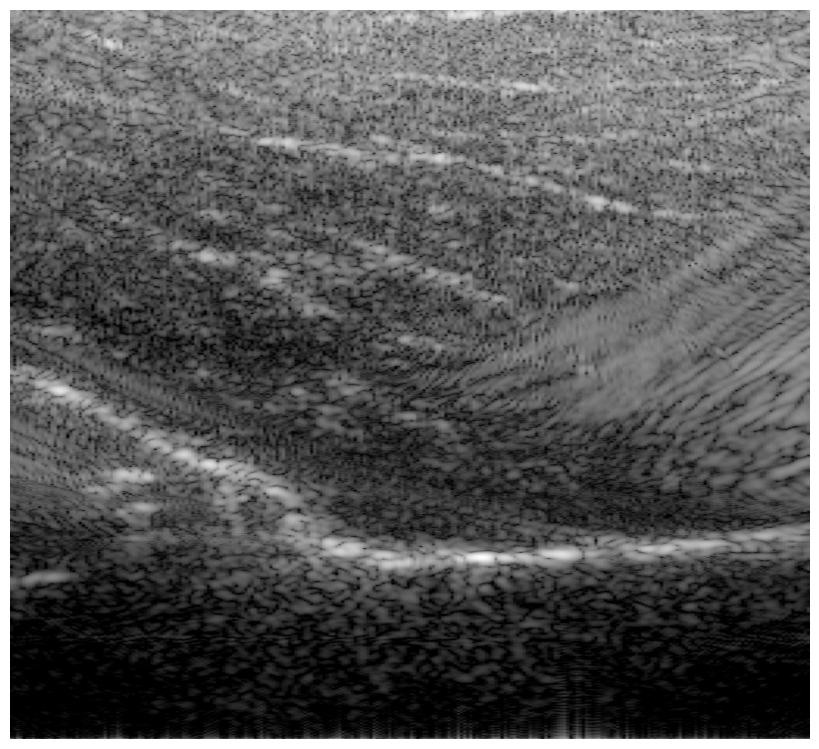

In [21]:
import matplotlib.pyplot as plt
from deep_bf.beamformers import compute_meshgrid, get_rf_bmode

# TODO: Sacar el zlims, xlims con el samples_idx

idx = 0
_o = output[idx].cpu()
name = sample[-1][idx]

pw = dl.get_defined_pwdata(name, "RF")
Z, X = compute_meshgrid(pw, nz, nx)

Z = Z.cpu()
X = X.cpu()

zlims = np.array([Z[0, 0], Z[-1, 0]]) * 1e3
xlims = np.array([X[0, 0], X[0, -1]]) * 1e3

vmin = -60
vmax = 0

fig = plt.figure(figsize=(8, 10), frameon=False)
ax = fig.add_axes([0, 0, 1, 1])

b_mode = get_rf_bmode(_o, vmin, vmax)
extent = (xlims[0], xlims[-1], zlims[-1], zlims[0])

ax.imshow(b_mode, cmap='gray', vmin=vmin, vmax=vmax,
          extent=extent,
          aspect='equal')
ax.set_axis_off()
plt.show()